In [1]:
import os
import pandas as pd


In [2]:
#change directory
os.chdir("D:\insofe\Data\hot")

In [3]:
#read csv files
train=pd.read_csv("CSE7302c_train.csv",na_values=["?",","])
test=pd.read_csv("CSE7302c_test.csv",na_values=["?",","])

In [4]:
#observation
test.head(3)

,class,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b.tag,...,jet4phi,jet4b.tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,id
0,1,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487,68637
1,1,1.176566,0.104161,1.397002,0.479721,0.265513,1.135563,1.534831,-0.253291,0.000000,...,0.530334,0.000000,0.833175,0.773968,0.985750,1.103696,0.849140,0.937104,0.812364,68638
2,1,1.384098,0.116822,-1.179879,0.762913,-0.079782,1.019863,0.877318,1.276887,2.173076,...,0.504809,3.101961,0.959325,0.807376,1.191814,1.221210,0.861141,0.929341,0.838302,68639


In [5]:
#drop id
train=train.drop("id",axis=1)
test=test.drop("id",axis=1)

In [6]:
#check type
train.dtypes

class                         int64
lepton_pT                   float64
lepton_eta                  float64
lepton_phi                  float64
missing_energy_magnitude    float64
missing_energy_phi          float64
jet1pt                      float64
jet1eta                     float64
jet1phi                     float64
jet1b.tag                   float64
jet2pt                      float64
jet2eta                     float64
jet2phi                     float64
jet2b.tag                   float64
jet3pt                      float64
jet3eta                     float64
jet3phi                     float64
jet3b.tag                   float64
jet4pt                      float64
jet4eta                     float64
jet4phi                     float64
jet4b.tag                   float64
m_jj                        float64
m_jjj                       float64
m_lv                        float64
m_jlv                       float64
m_bb                        float64
m_wbb                       

In [7]:
#change class
train['class']=train['class'].astype('category')
test['class']=test['class'].astype('category')


In [8]:
train.shape

(68636, 29)

In [9]:
#missing value in test
test['jet4phi'].fillna(test['jet4phi'].mean(),inplace=True)
test['jet4b.tag'].fillna(test['jet4b.tag'].mean(),inplace=True)
test['m_jj'].fillna(test['m_jj'].mean(),inplace=True)
test['m_jjj'].fillna(test['m_jjj'].mean(),inplace=True)
test['m_lv'].fillna(test['m_lv'].mean(),inplace=True)
test['m_bb'].fillna(test['m_bb'].mean(),inplace=True)
test['m_wbb'].fillna(test['m_wbb'].mean(),inplace=True)
test['m_wwbb'].fillna(test['m_wwbb'].mean(),inplace=True)
test['m_jlv'].fillna(test['m_jlv'].mean(),inplace=True)


In [10]:
#split data
from sklearn import preprocessing, metrics, cross_validation
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# Divide in to train and test
train_target1=train["class"]
train1=train.drop('class', axis=1)
#from sklearn.model_selection import train_test_split  
train2,val2,train_target2,val_target2 = train_test_split(train1, train_target1, test_size=0.20,shuffle=False)  

In [12]:
val2.head(3)

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b.tag,jet2pt,...,jet4eta,jet4phi,jet4b.tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
54908,0.922183,-0.959413,-1.607677,0.227909,0.886045,1.189428,-1.232862,-0.662423,2.173076,0.854129,...,-0.295280,-1.359247,1.550981,0.900421,1.002291,0.998372,1.100182,0.803773,0.975899,0.897521
54909,0.832142,0.202531,-1.569946,0.639471,0.482941,0.784433,0.113851,-0.175679,0.000000,1.143582,...,-0.587601,0.175191,0.000000,0.794644,1.078813,0.988189,0.802127,0.918036,0.918264,0.787956
54910,0.824639,1.887497,0.357747,0.895333,-0.429904,0.507229,1.600186,1.030745,1.086538,0.876540,...,-0.040436,-1.046831,3.101961,2.828506,1.554314,0.987678,0.761907,0.956315,1.191481,1.111535


In [18]:
test_target2=test["class"]
test2=test.drop('class', axis=1)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
#taking variables to scale them
num_atr=train2.select_dtypes(['int64','float64']).columns


In [21]:
num_atr

Index(['lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude',
       'missing_energy_phi', 'jet1pt', 'jet1eta', 'jet1phi', 'jet1b.tag',
       'jet2pt', 'jet2eta', 'jet2phi', 'jet2b.tag', 'jet3pt', 'jet3eta',
       'jet3phi', 'jet3b.tag', 'jet4pt', 'jet4eta', 'jet4phi', 'jet4b.tag',
       'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'],
      dtype='object')

In [22]:
#standarization
scaler = StandardScaler()
scaler.fit(train2[num_atr])


StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
#transforming
train2[num_atr]=scaler.transform(train2[num_atr])
val2[num_atr]=scaler.transform(val2[num_atr])
test2[num_atr]=scaler.transform(test2[num_atr])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_array(key,

In [25]:
train2.head(3)

,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b.tag,jet2pt,...,jet4eta,jet4phi,jet4b.tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,-0.144018,0.333193,0.357634,0.833380,-0.306313,0.226126,-0.546505,-1.574551,1.146761,-0.359769,...,-1.124380,0.000599,-0.70828,-1.109713,-0.509041,-0.388597,-0.079969,-0.369139,-0.109122,-0.510164
1,-0.337414,1.467660,-1.625982,-0.908937,0.427896,0.245844,1.275837,1.369681,-0.969186,-0.281273,...,1.123083,0.895082,-0.70828,-0.187834,0.227873,-0.388642,-0.146805,-0.324123,-0.455346,-0.567910
2,0.633146,-0.865161,0.930734,1.657788,0.881982,1.683302,-1.625395,-0.934284,-0.969186,2.869159,...,-0.667954,-1.348687,-0.70828,-0.131843,0.014717,-0.310002,-0.703750,-0.197898,-0.014973,-0.004594


In [26]:
#import lib
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [101]:
#creating model
model2 = RandomForestClassifier(n_estimators=1000,max_depth=5)
model2.fit(X=train2, y=train_target2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [102]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

train_pred2 = model2.predict(train2)
print(accuracy_score(train_target2,train_pred2))
val_pred2= model2.predict(val2)
print(accuracy_score(val_target2,val_pred2))
test_pred2= model2.predict(test2)
print(accuracy_score(test_target2,test_pred2))

0.6721242806148466
0.6613490675990676
0.6620996804242878


In [27]:
#to see only 2nd row what it haves
train.iloc[2]

class                              0
lepton_pT                    1.34438
lepton_eta                 -0.876626
lepton_phi                  0.935913
missing_energy_magnitude     1.99205
missing_energy_phi          0.882454
jet1pt                       1.78607
jet1eta                     -1.64678
jet1phi                    -0.942383
jet1b.tag                          0
jet2pt                       2.42326
jet2eta                    -0.676016
jet2phi                     0.736159
jet2b.tag                    2.21487
jet3pt                       1.29872
jet3eta                     -1.43074
jet3phi                    -0.364658
jet3b.tag                          0
jet4pt                      0.745313
jet4eta                    -0.678379
jet4phi                     -1.36036
jet4b.tag                          0
m_jj                        0.946652
m_jjj                         1.0287
m_lv                        0.998656
m_jlv                       0.728281
m_bb                          0.8692
m

In [28]:
#get name of col 2
train2.columns[2]


'lepton_phi'

In [29]:
#get name of col 22
train2.columns[22]

'm_jjj'

In [30]:
#check shape
train2.shape

(54908, 28)

In [31]:
#taking var from 2 to 23
var_comp=train2.loc[:,'lepton_phi':'m_jjj']

In [32]:
var_comp.head(3)

,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1pt,jet1eta,jet1phi,jet1b.tag,jet2pt,jet2eta,jet2phi,...,jet3pt,jet3eta,jet3phi,jet3b.tag,jet4pt,jet4eta,jet4phi,jet4b.tag,m_jj,m_jjj
0,0.357634,0.833380,-0.306313,0.226126,-0.546505,-1.574551,1.146761,-0.359769,-0.215458,1.257575,...,-1.007599,-1.250472,0.726165,-0.841026,-1.167046,-1.124380,0.000599,-0.70828,-1.109713,-0.509041
1,-1.625982,-0.908937,0.427896,0.245844,1.275837,1.369681,-0.969186,-0.281273,1.529923,-0.820184,...,0.002496,0.351458,-0.209650,1.288612,0.538306,1.123083,0.895082,-0.70828,-0.187834,0.227873
2,0.930734,1.657788,0.881982,1.683302,-1.625395,-0.934284,-0.969186,2.869159,-0.675481,0.726031,...,0.627246,-1.418148,-0.364683,-0.841026,-0.478328,-0.667954,-1.348687,-0.70828,-0.131843,0.014717


In [33]:
#check shape 
var_comp.shape

(54908, 21)

In [34]:
import numpy as np

In [35]:
import matplotlib.pyplot as plt

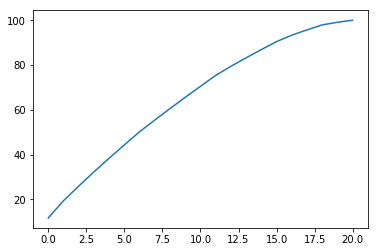

In [36]:
#applying pca on 2 to 22 col
from sklearn.decomposition import PCA

pca_comp = PCA(n_components=21)
pca_comp.fit(var_comp)

#to know variance ratio
pca_var_comp=np.cumsum(np.round(pca_comp.explained_variance_ratio_, decimals=4)*100)
plt.plot(pca_var_comp)



In [37]:
print(pca_var_comp)


[ 11.72  19.41  25.93  32.31  38.37  44.34  50.22  55.43  60.56  65.6
  70.5   75.36  79.44  83.21  86.91  90.46  93.33  95.71  97.92  99.1
 100.  ]


In [38]:
#select now no. of component #taking 10 component #taking 80% var
pca_comp_final = PCA(n_components=10)
pca_comp_final.fit(var_comp)
pca_trans_comp=pca_comp_final.fit_transform(var_comp)
print(pca_trans_comp)

[[-1.71380609 -1.52398662  1.71172816 ... -0.52447021 -0.32262465
  -0.7715284 ]
 [ 0.26227993  2.09658456  0.74346446 ... -0.26920167 -1.09808646
   1.2226195 ]
 [ 2.02749707 -2.19356428  2.84137216 ...  0.31609428  0.95146493
  -0.74739057]
 ...
 [-0.53305704 -1.06913062 -0.29884527 ...  0.22115582  1.12958138
  -0.84919493]
 [-0.3731645   0.72253272  1.50913702 ...  0.12708768 -0.2751659
   1.75919919]
 [-1.23891406  0.38524842  0.1624517  ...  1.85047837  0.70034926
  -0.35755368]]


In [39]:
#drop those previous feature and taking features from pca: components
train2=train2.drop(var_comp,axis=1)

In [40]:
#check shape as features dropped
train2.shape

(54908, 7)

In [41]:
pca_trans_comp[1]

array([ 0.26227993,  2.09658456,  0.74346446,  0.87266281, -0.20448587,
       -2.43185692,  0.19983633, -0.26920167, -1.09808646,  1.2226195 ])

In [42]:
#changing class
pca_trans_comp=pd.DataFrame(pca_trans_comp)

In [43]:
pca_trans_comp.tail(2)

,0,1,2,3,4,5,6,7,8,9
54906,-0.373164,0.722533,1.509137,-0.778445,0.401131,-0.405123,2.010678,0.127088,-0.275166,1.759199
54907,-1.238914,0.385248,0.162452,-0.525935,0.003095,-0.323543,-0.693483,1.850478,0.700349,-0.357554


In [44]:
#binding
final_train= pd.concat([train2,pca_trans_comp], axis=1)


In [45]:
#check shape after binding
final_train.shape

(54908, 17)

In [46]:
#check index
train2.index.values

array([    0,     1,     2, ..., 54905, 54906, 54907], dtype=int64)

In [47]:
#check index
pca_trans_comp.index.values

array([    0,     1,     2, ..., 54905, 54906, 54907], dtype=int64)

In [48]:
final_train.head(2)

,lepton_pT,lepton_eta,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,0,1,2,3,4,5,6,7,8,9
0,-0.144018,0.333193,-0.388597,-0.079969,-0.369139,-0.109122,-0.510164,-1.713806,-1.523987,1.711728,-0.640568,0.474572,2.021269,-0.773516,-0.524470,-0.322625,-0.771528
1,-0.337414,1.467660,-0.388642,-0.146805,-0.324123,-0.455346,-0.567910,0.262280,2.096585,0.743464,0.872663,-0.204486,-2.431857,0.199836,-0.269202,-1.098086,1.222619


In [42]:
#check index again
train2.index

Int64Index([20959, 21581, 64162, 54704, 54023, 16505, 60643, 22135, 37279,
            48496,
            ...
            29450, 10674, 15142, 63571,  9055,  1413, 39620, 36089, 30302,
            21019],
           dtype='int64', length=54908)

In [49]:
#check na
final_train.isnull().sum()

lepton_pT     0
lepton_eta    0
m_lv          0
m_jlv         0
m_bb          0
m_wbb         0
m_wwbb        0
0             0
1             0
2             0
3             0
4             0
5             0
6             0
7             0
8             0
9             0
dtype: int64

In [50]:
final_train

,lepton_pT,lepton_eta,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,0,1,2,3,4,5,6,7,8,9
0,-0.144018,0.333193,-0.388597,-0.079969,-0.369139,-0.109122,-0.510164,-1.713806,-1.523987,1.711728,-0.640568,0.474572,2.021269,-0.773516,-0.524470,-0.322625,-0.771528
1,-0.337414,1.467660,-0.388642,-0.146805,-0.324123,-0.455346,-0.567910,0.262280,2.096585,0.743464,0.872663,-0.204486,-2.431857,0.199836,-0.269202,-1.098086,1.222619
2,0.633146,-0.865161,-0.310002,-0.703750,-0.197898,-0.014973,-0.004594,2.027497,-2.193564,2.841372,-0.992578,-1.180273,1.187487,-1.103661,0.316094,0.951465,-0.747391
3,1.080496,-0.597999,-0.473168,-0.551697,-1.037462,-0.194011,-0.004867,-0.815575,-0.841385,-1.110798,-0.882300,-0.213272,0.532829,1.778806,-1.664925,1.559294,-0.630595
4,-1.030252,-1.867015,-0.298044,-1.161278,-0.524324,-0.150312,-0.413704,-0.485274,-0.649996,-0.924978,-0.770409,0.461269,0.942044,1.693161,-2.376373,0.693768,1.121345
5,-0.097134,0.631329,-0.425015,-0.566368,-0.236187,-0.377488,-0.584507,-0.456644,-0.952426,-0.915518,1.582842,0.222823,1.088511,-0.414839,0.751387,0.005238,-1.686064
6,0.741239,0.539372,0.764747,0.087958,1.091691,6.853268,5.644357,8.216047,-0.111349,3.061424,1.150912,2.270822,1.354944,-0.619722,0.608370,-0.099718,0.584629
7,-0.075646,1.110477,-0.336064,-0.254382,-0.376514,-0.681577,-0.742163,0.024145,0.275302,-0.537571,-2.090841,-0.267607,0.179518,-2.027418,0.589284,1.460223,0.793043
8,-0.443228,-0.171122,-0.409846,-1.168595,0.532821,-0.553601,-0.627508,-0.553536,0.034604,-1.742727,-0.884183,0.316623,1.506330,-0.104044,1.187405,0.505365,0.705688
9,0.702821,0.889779,-0.385565,0.847688,-0.305870,-0.215783,-0.569161,-1.996182,0.103574,1.177339,-0.828163,0.731901,1.091936,-0.400678,0.733953,0.000049,0.986956


In [86]:
#taking var from 2 to 23
var_comp1=test.loc[:,'lepton_phi':'m_jjj']



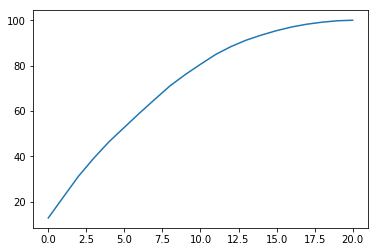

In [87]:
#applying pca on 2 to 22 col
from sklearn.decomposition import PCA

pca_comp1 = PCA(n_components=21)
pca_comp1.fit(var_comp1)

#to know variance ratio
pca_var_comp1=np.cumsum(np.round(pca_comp1.explained_variance_ratio_, decimals=4)*100)
plt.plot(pca_var_comp1)



In [88]:
#select now no. of component #taking 10 component #taking 80% var
pca_comp_final1 = PCA(n_components=10)
pca_comp_final1.fit(var_comp1)
pca_trans_comp1=pca_comp_final1.fit_transform(var_comp1)
print(pca_trans_comp1)

[[-0.6491493  -1.24272368  0.08978922 ...  0.80892037  1.77401651
   0.1133815 ]
 [-1.1950593   2.12703496 -0.827469   ... -0.03875836 -0.21812407
   0.06166774]
 [ 2.31742834  0.06281032 -1.97125923 ... -0.99951927 -0.3458148
  -0.01134683]
 ...
 [-0.19138933 -0.03126782 -0.99001813 ... -1.87093033 -1.18461483
   1.64419021]
 [-1.54847685  1.2382021  -1.48860932 ... -0.57917385 -1.6075451
   0.79161802]
 [ 0.08937387 -1.12647525 -3.20335268 ...  0.00925968  0.79851533
  -0.48151597]]


In [89]:
test2=test2.drop(var_comp1,axis=1)

In [90]:
#changing class
pca_trans_comp1=pd.DataFrame(pca_trans_comp1)

In [91]:
pca_trans_comp1

,0,1,2,3,4,5,6,7,8,9
0,-0.649149,-1.242724,0.089789,1.485997,1.220169,0.716600,-0.136002,0.808920,1.774017,0.113382
1,-1.195059,2.127035,-0.827469,0.033892,1.214501,1.633952,0.058554,-0.038758,-0.218124,0.061668
2,2.317428,0.062810,-1.971259,-1.570626,-1.929865,-0.484261,0.484917,-0.999519,-0.345815,-0.011347
3,2.408377,0.256055,-1.695151,-0.881554,0.366680,0.057950,0.758431,0.542857,1.507186,-0.186352
4,-0.704467,-1.344846,-0.926818,-0.828503,-0.922016,-1.499090,0.219941,-0.649893,1.650625,-0.830987
5,2.482172,0.003705,1.410642,-0.167311,1.086610,0.513208,1.428676,-1.099553,-0.416845,-0.669975
6,-0.799109,-1.846643,-0.830238,0.180169,0.673623,1.195735,-0.974050,-0.855568,-2.222597,-1.440105
7,2.234129,-0.845839,2.274781,-1.539726,-1.167609,-0.261198,-0.141448,-1.062462,-1.462064,-0.769502
8,-1.508436,1.022382,0.080842,-1.567599,-2.023366,-0.704875,-0.412703,0.560615,0.129978,-0.733442
9,-0.575182,-1.152902,0.218395,-1.540180,-1.035435,0.105024,-0.091873,-0.279075,-1.646947,-1.580651


In [95]:
test2

,lepton_pT,lepton_eta,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,0.207285,0.325449,-0.383077,-0.429575,0.307576,-0.438038,-0.478023
1,0.334588,0.109591,-0.388292,0.233641,-0.236293,-0.260426,-0.465737
2,0.703797,0.122174,0.861714,0.527067,-0.213323,-0.281685,-0.383551
3,0.607751,0.206388,-0.362498,-0.688771,-1.135992,-0.732378,-1.002605
4,0.536123,-1.408195,-0.307372,0.248403,0.291879,-0.408862,-0.316717
5,2.632220,0.666176,-0.324538,-0.162117,-1.245749,-0.813422,1.618939
6,0.046122,0.018601,0.134860,-0.510265,0.301663,-0.531128,-0.656836
7,-0.589414,-0.889360,-0.028887,-0.627717,-0.142702,-0.502556,-0.615563
8,-1.218113,-1.410131,-0.387092,0.913167,0.643788,0.133252,-0.008739
9,-0.193506,0.619714,3.979797,1.060718,-0.716614,-0.331125,0.151439


In [93]:
#binding
final_test= pd.concat([test2,pca_trans_comp1], axis=1)


In [94]:
final_test.shape

(29414, 17)

In [97]:
final_test

,lepton_pT,lepton_eta,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,0,1,2,3,4,5,6,7,8,9
0,0.207285,0.325449,-0.383077,-0.429575,0.307576,-0.438038,-0.478023,-0.649149,-1.242724,0.089789,1.485997,1.220169,0.716600,-0.136002,0.808920,1.774017,0.113382
1,0.334588,0.109591,-0.388292,0.233641,-0.236293,-0.260426,-0.465737,-1.195059,2.127035,-0.827469,0.033892,1.214501,1.633952,0.058554,-0.038758,-0.218124,0.061668
2,0.703797,0.122174,0.861714,0.527067,-0.213323,-0.281685,-0.383551,2.317428,0.062810,-1.971259,-1.570626,-1.929865,-0.484261,0.484917,-0.999519,-0.345815,-0.011347
3,0.607751,0.206388,-0.362498,-0.688771,-1.135992,-0.732378,-1.002605,2.408377,0.256055,-1.695151,-0.881554,0.366680,0.057950,0.758431,0.542857,1.507186,-0.186352
4,0.536123,-1.408195,-0.307372,0.248403,0.291879,-0.408862,-0.316717,-0.704467,-1.344846,-0.926818,-0.828503,-0.922016,-1.499090,0.219941,-0.649893,1.650625,-0.830987
5,2.632220,0.666176,-0.324538,-0.162117,-1.245749,-0.813422,1.618939,2.482172,0.003705,1.410642,-0.167311,1.086610,0.513208,1.428676,-1.099553,-0.416845,-0.669975
6,0.046122,0.018601,0.134860,-0.510265,0.301663,-0.531128,-0.656836,-0.799109,-1.846643,-0.830238,0.180169,0.673623,1.195735,-0.974050,-0.855568,-2.222597,-1.440105
7,-0.589414,-0.889360,-0.028887,-0.627717,-0.142702,-0.502556,-0.615563,2.234129,-0.845839,2.274781,-1.539726,-1.167609,-0.261198,-0.141448,-1.062462,-1.462064,-0.769502
8,-1.218113,-1.410131,-0.387092,0.913167,0.643788,0.133252,-0.008739,-1.508436,1.022382,0.080842,-1.567599,-2.023366,-0.704875,-0.412703,0.560615,0.129978,-0.733442
9,-0.193506,0.619714,3.979797,1.060718,-0.716614,-0.331125,0.151439,-0.575182,-1.152902,0.218395,-1.540180,-1.035435,0.105024,-0.091873,-0.279075,-1.646947,-1.580651


In [100]:
#creating model after pca
model3 = RandomForestClassifier(n_estimators=1000,max_depth=4)
model3.fit(X=final_train, y=train_target2)
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

train_pred3 = model3.predict(final_train)
print(accuracy_score(train_target2,train_pred3))
test_pred3= model3.predict(final_test)
print(accuracy_score(test_target2,test_pred3))

0.6604502076200189
0.6230366492146597


In [103]:
 #drop in accuracy so model2 without pca is good
    

In [104]:
#decision tree
#model4


In [28]:
train2.shape

(54908, 28)

In [30]:
from sklearn import tree
model4 = tree.DecisionTreeClassifier(max_depth=5)
model4.fit(train2, train_target2)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
print('Train Accuracy =',model4.score(train2,train_target2))
print('val Accuracy =',model4.score(val2,val_target2))
print('Test Accuracy =',model4.score(test2,test_target2))

Train Accuracy = 0.6696838347781744
val Accuracy = 0.6606934731934732
Test Accuracy = 0.6088937240769702


In [32]:
from sklearn.metrics import classification_report
print("Train - Report")
print(classification_report(train_target2,model4.predict(train2)))
print("val - Report")
print(classification_report(val_target2,model4.predict(val2)))
print("Test - Report")
print(classification_report(test_target2,model4.predict(test2)))

Train - Report
             precision    recall  f1-score   support

          0       0.65      0.63      0.64     25731
          1       0.68      0.71      0.69     29177

avg / total       0.67      0.67      0.67     54908

val - Report
             precision    recall  f1-score   support

          0       0.66      0.61      0.63      6626
          1       0.66      0.71      0.68      7102

avg / total       0.66      0.66      0.66     13728

Test - Report
             precision    recall  f1-score   support

          0       0.64      0.39      0.49     13866
          1       0.60      0.80      0.68     15548

avg / total       0.62      0.61      0.59     29414



In [112]:
from sklearn import svm

In [113]:
#model6 SVM


In [114]:
model6= svm.SVC(C=10,kernel='linear')
model6.fit(train2,train_target2)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [115]:
train_pred6= model6.predict(train2)
val_pred6 = model6.predict(val2)
test_pred6 = model6.predict(test2)
from sklearn.metrics import accuracy_score
print(accuracy_score(train_target2,train_pred6))
print(accuracy_score(val_target2,val_pred6)) 
print(accuracy_score(test_target2,test_pred6))

0.6150287754061339
0.6067162004662005
0.610355612973414
